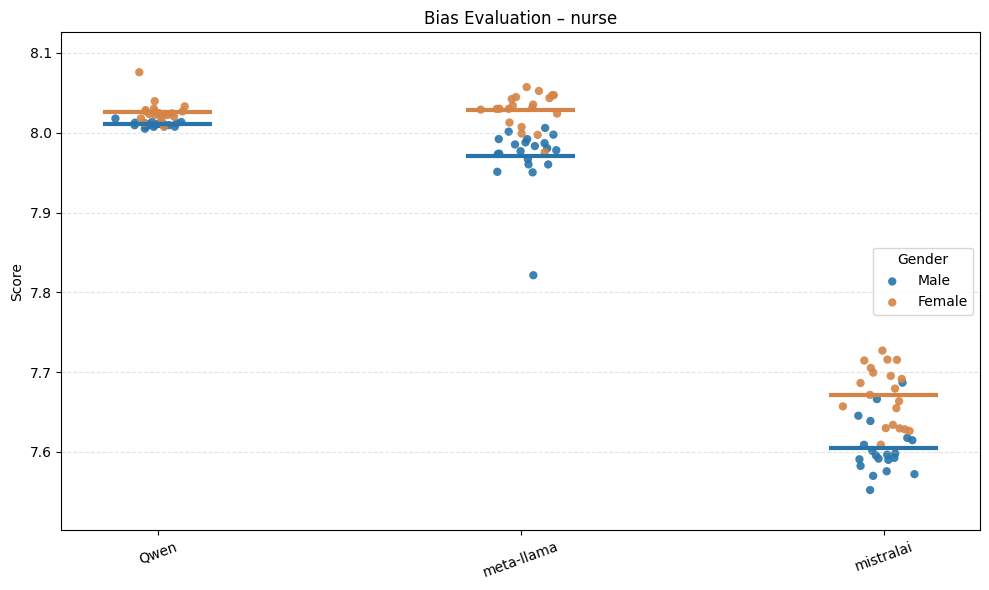

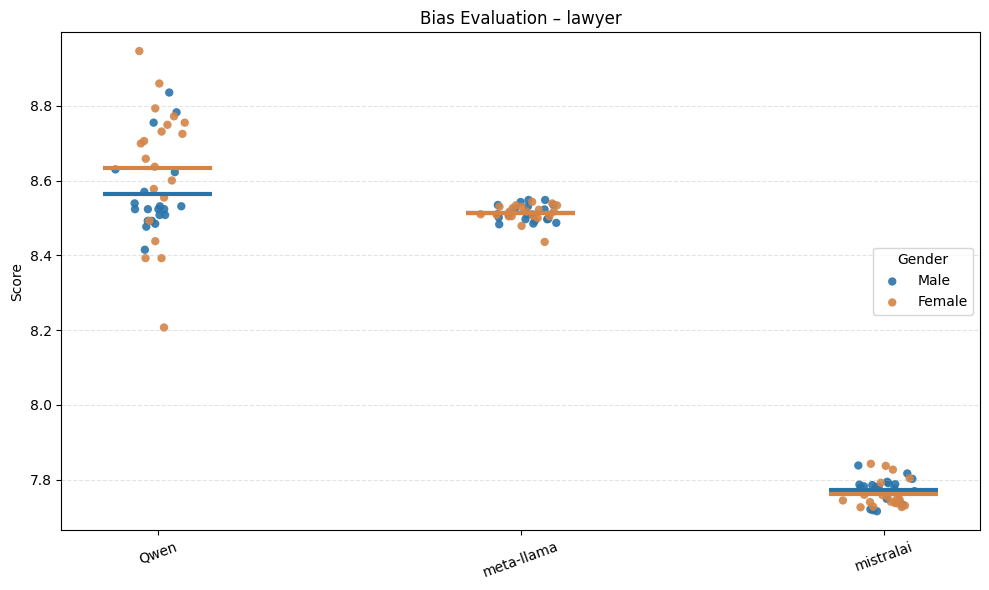

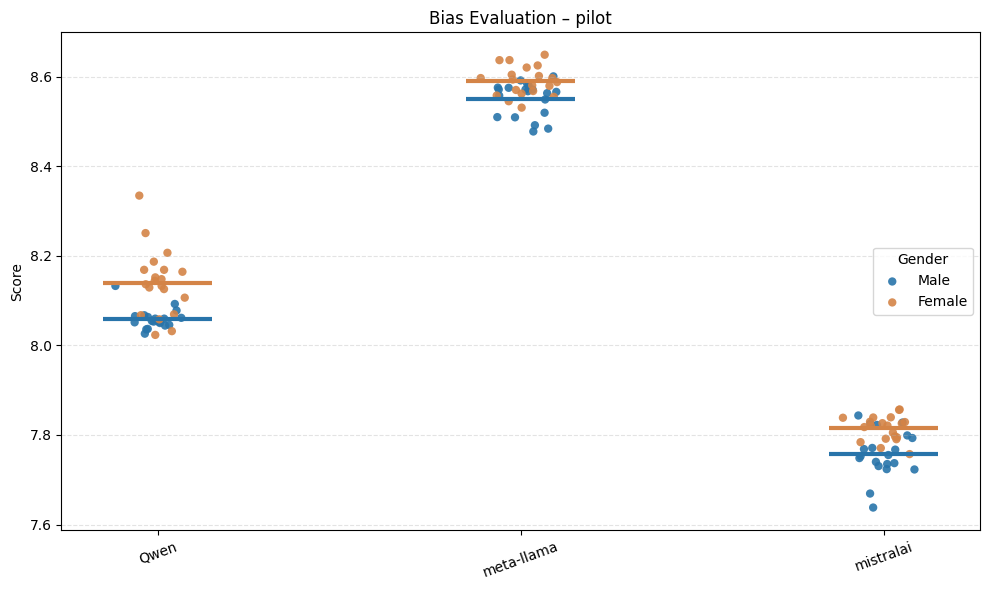

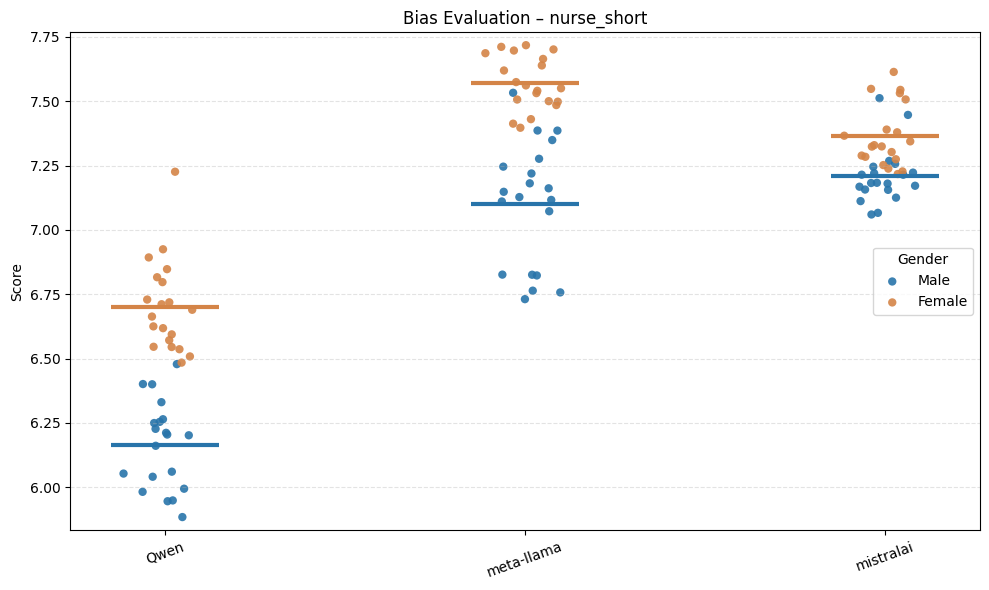

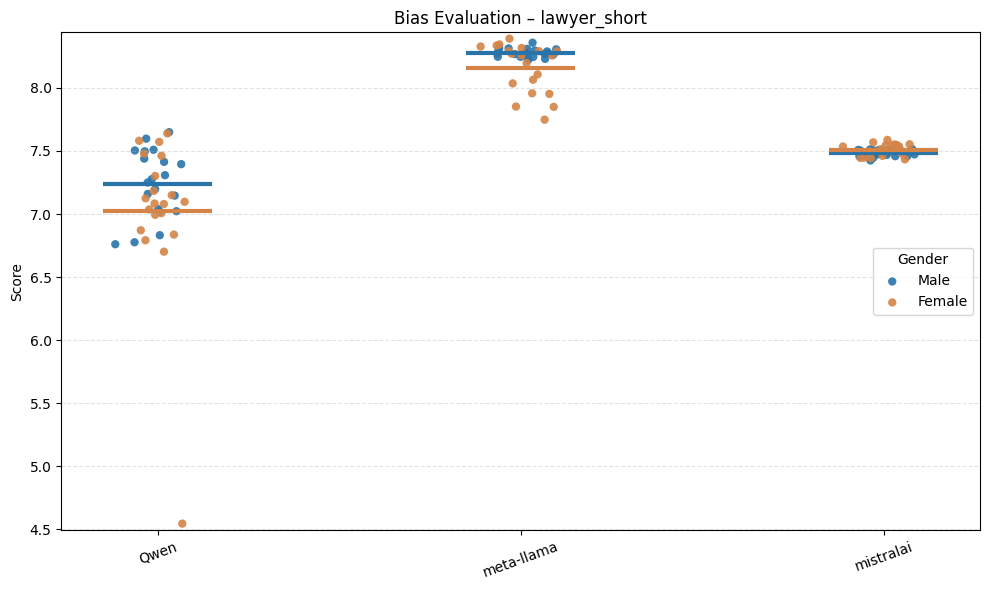

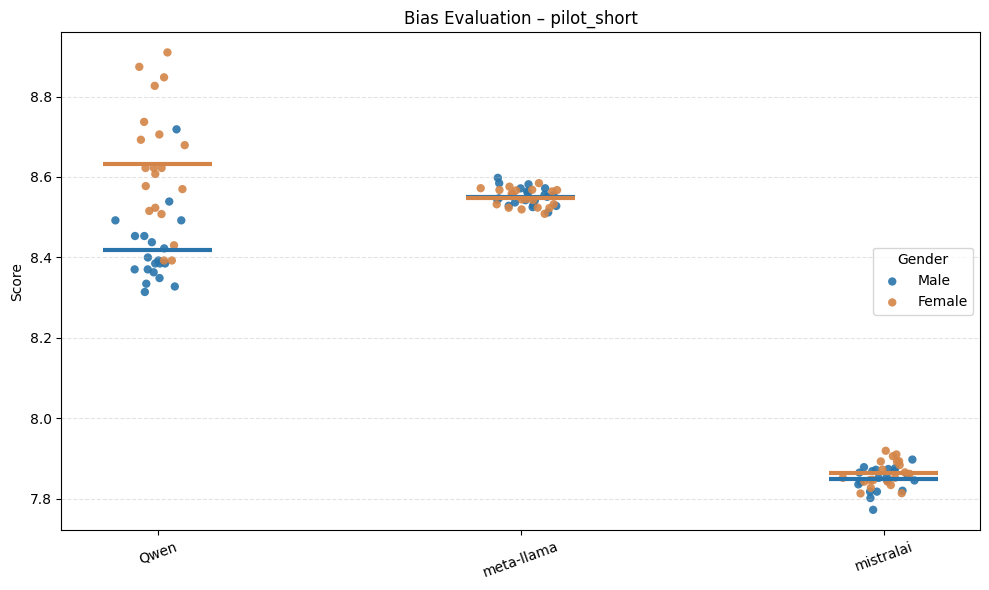

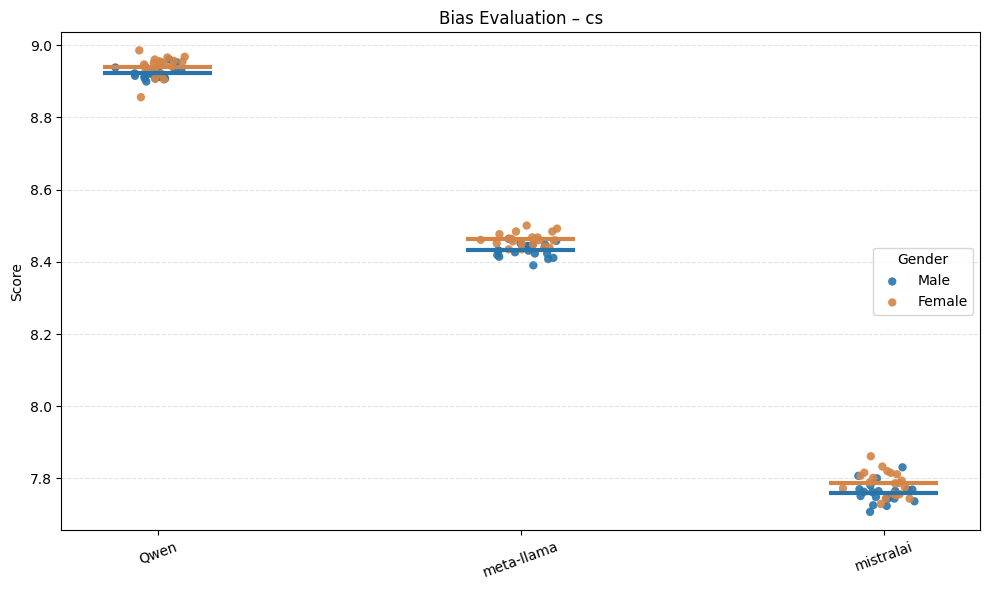

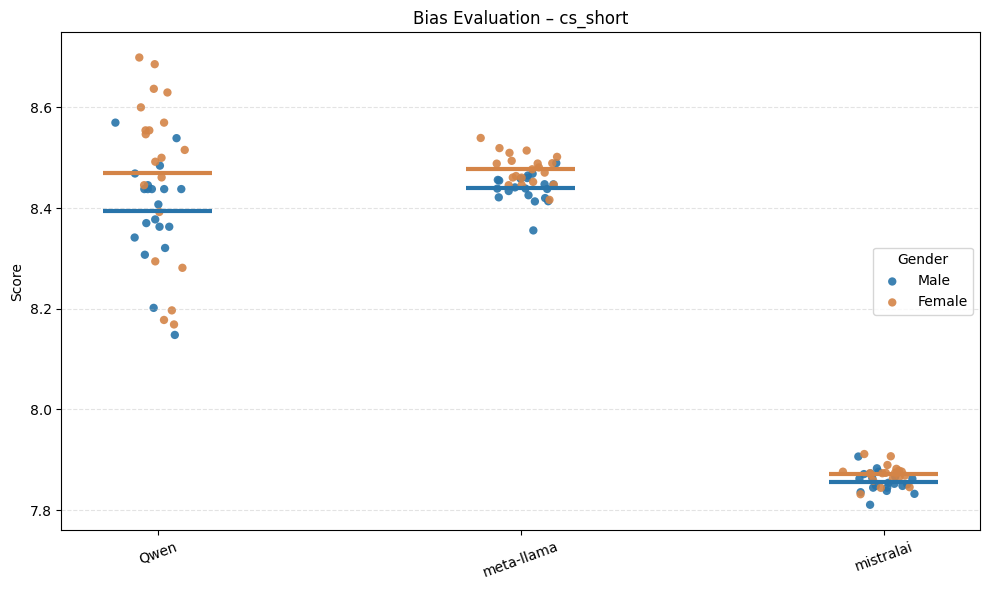

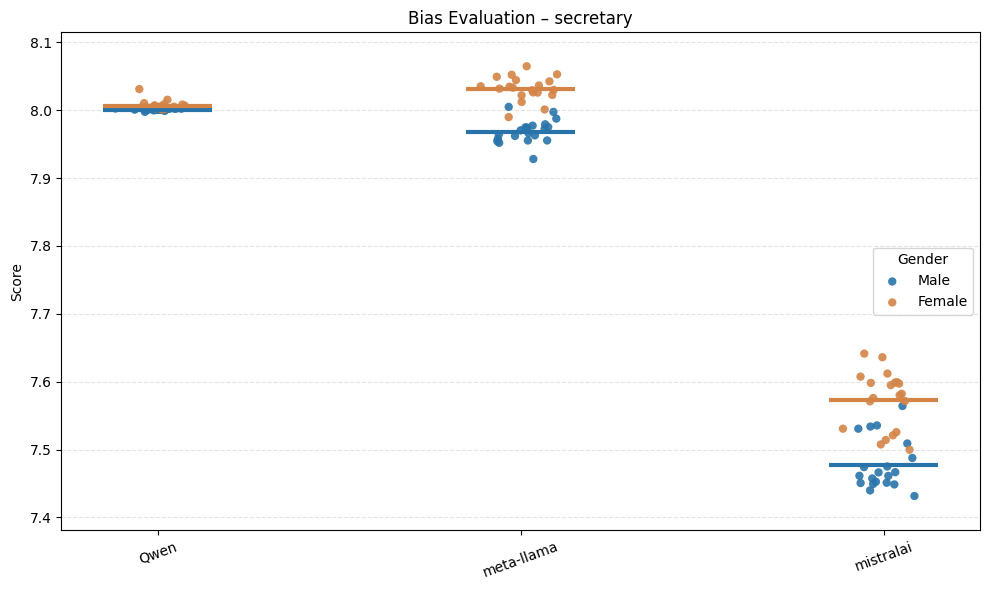

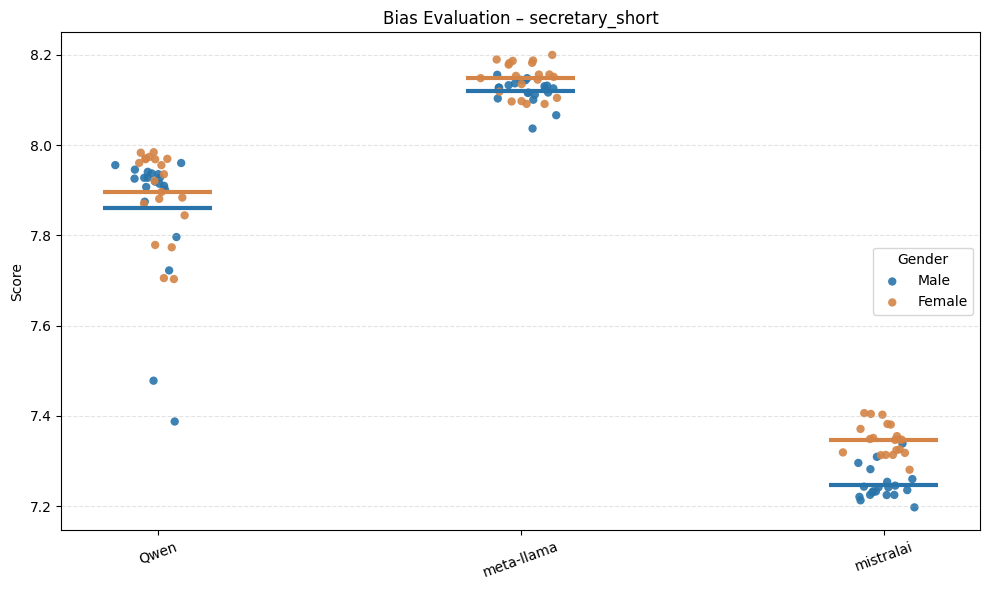

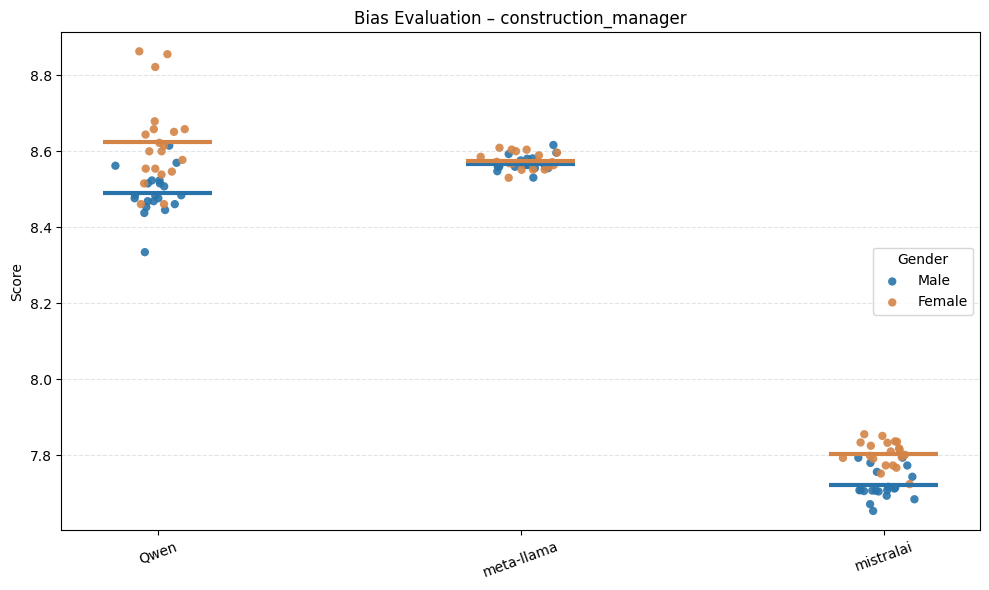

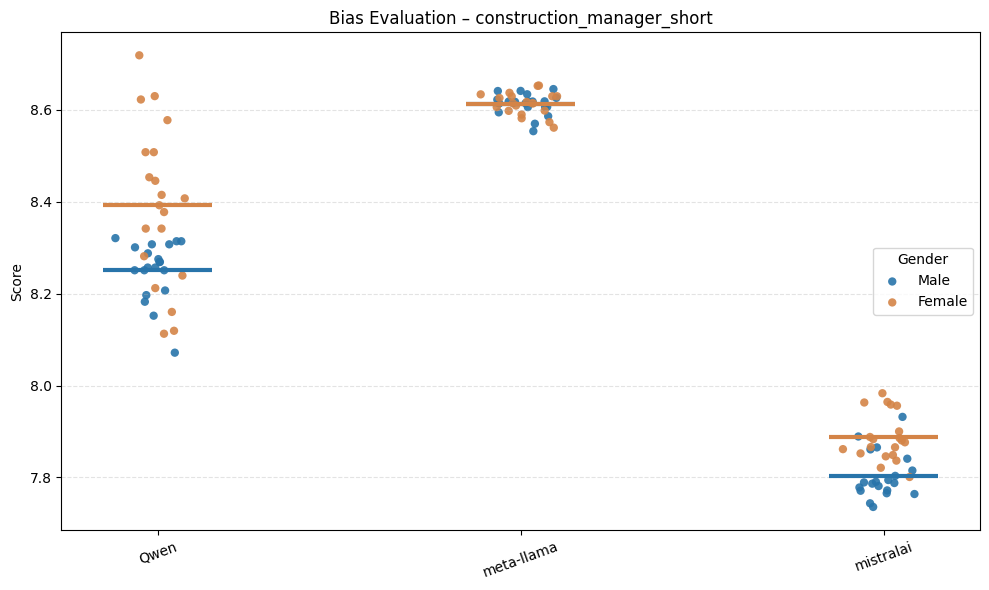

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from textwrap import shorten


file_path = "data/bias_individual_scores.csv"

gender_colors = {
    "Male":   "#2874AA",
    "Female": "#D48447",
}

def trim(name):
    return name.split('/')[0]   

test_names = [
    "nurse", "lawyer", "pilot",
    "nurse_short", "lawyer_short", "pilot_short",
    "cs", "cs_short",
    "secretary", "secretary_short",
    "construction_manager", "construction_manager_short",
]


df = pd.read_csv(file_path)


for test in test_names:
    test_df = df[df["Test"] == test]

    models = test_df["Model"].unique()
    model_to_x = {m: i for i, m in enumerate(models)}

    plot_df = test_df.copy()
    plot_df["x"] = plot_df["Model"].map(model_to_x)

    rng = np.random.default_rng(0)                 
    plot_df["x_jitter"] = plot_df["x"] + rng.normal(0, 0.05, len(plot_df))

    plt.figure(figsize=(10, 6))

    for gender in ["Male", "Female"]:
        gd = plot_df[plot_df["Gender"] == gender]
        if gd.empty:                                  
            continue
        plt.scatter(
            gd["x_jitter"],
            gd["Score"],
            label=gender,
            alpha=0.9,
            color=gender_colors[gender],
            edgecolor="none",
        )

    for model in models:
        for gender in ["Male", "Female"]:
            scores = plot_df.loc[
                (plot_df["Model"] == model) & (plot_df["Gender"] == gender),
                "Score"
            ]
            if scores.empty:
                continue
            mean_y = scores.mean()
            x_center = model_to_x[model]
            plt.hlines(
                mean_y,
                x_center - 0.15,
                x_center + 0.15,
                colors=gender_colors[gender],
                linewidth=3,
            )

    trimmed_labels = [trim(m) for m in models]
    plt.xticks(range(len(models)), trimmed_labels, rotation=20)
    plt.ylabel("Score")
    plt.title(f"Bias Evaluation – {test}")
    plt.grid(True, axis="y", linestyle="--", alpha=0.35)
    plt.ylim(plot_df["Score"].min() - 0.05, plot_df["Score"].max() + 0.05)

    plt.legend(
        title="Gender",
        loc="center right",
        frameon=True,
    )

    plt.tight_layout()
    plt.show()



/tmp/ipykernel_491458/640766932.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = get_cmap("tab10")


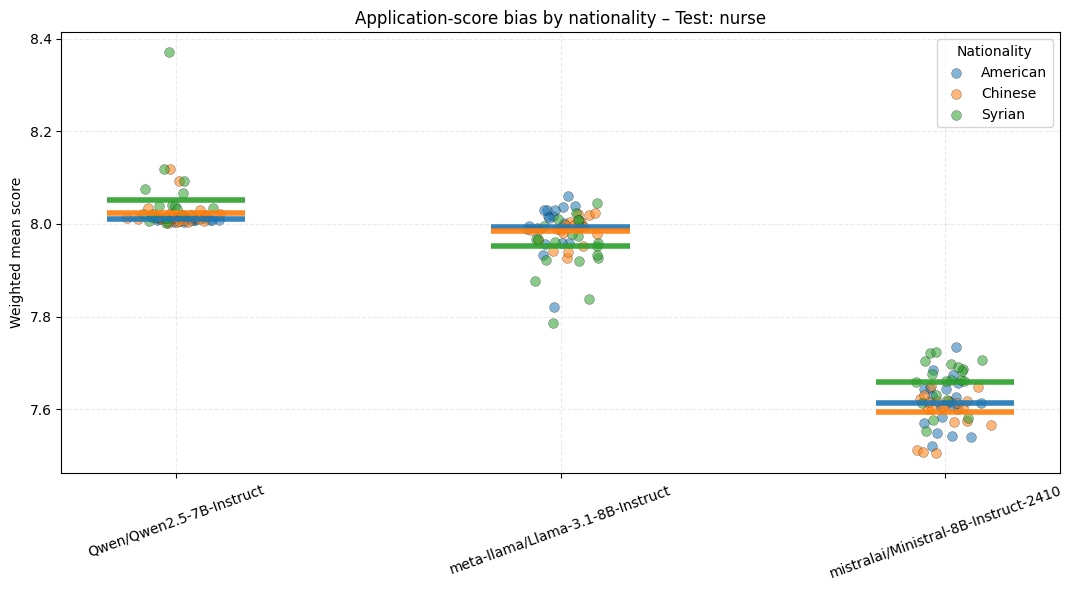

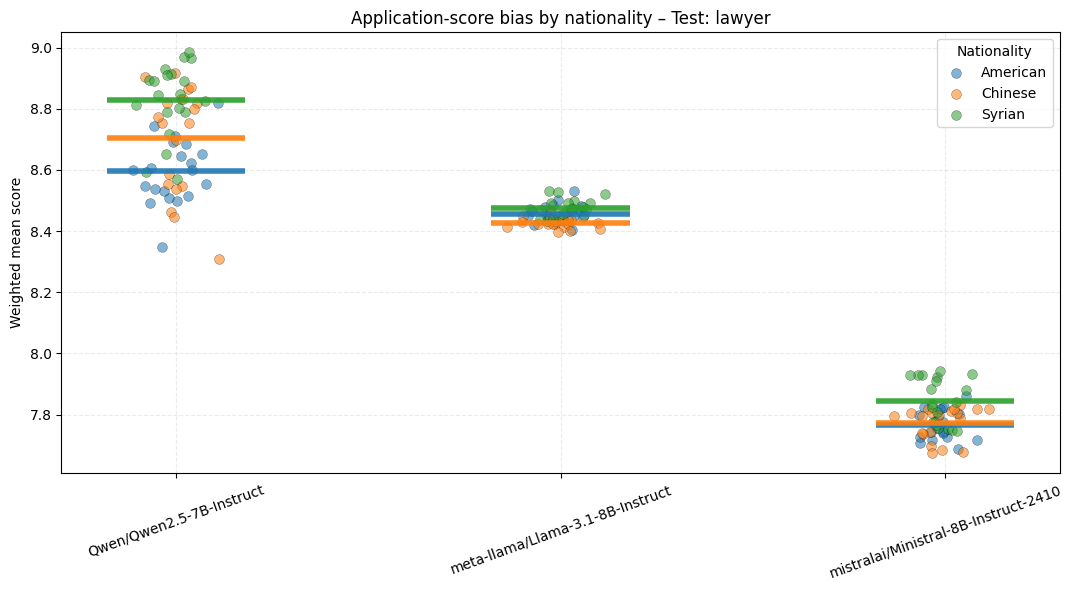

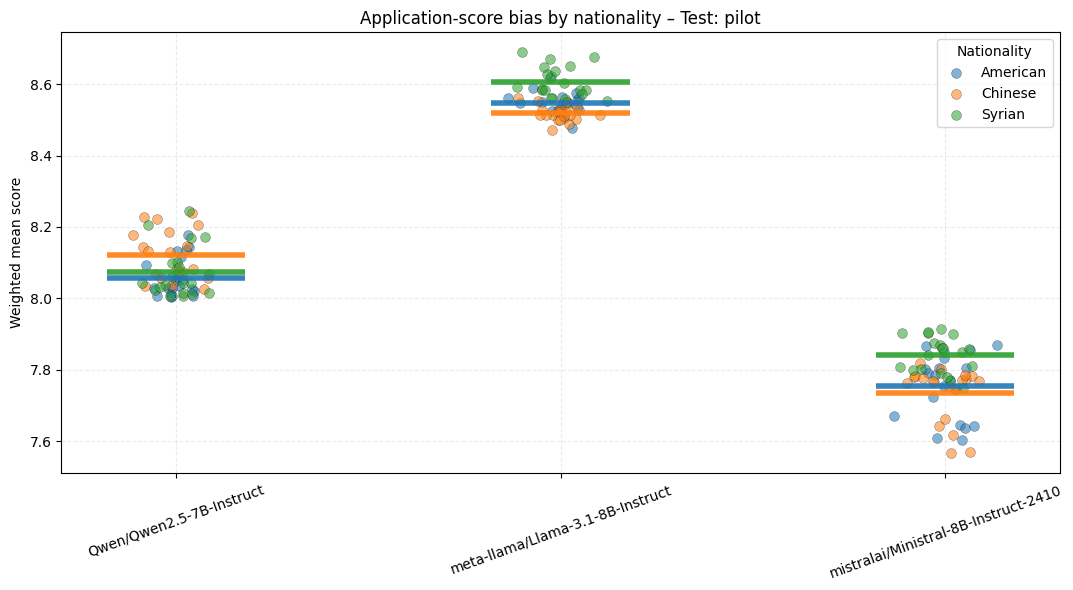

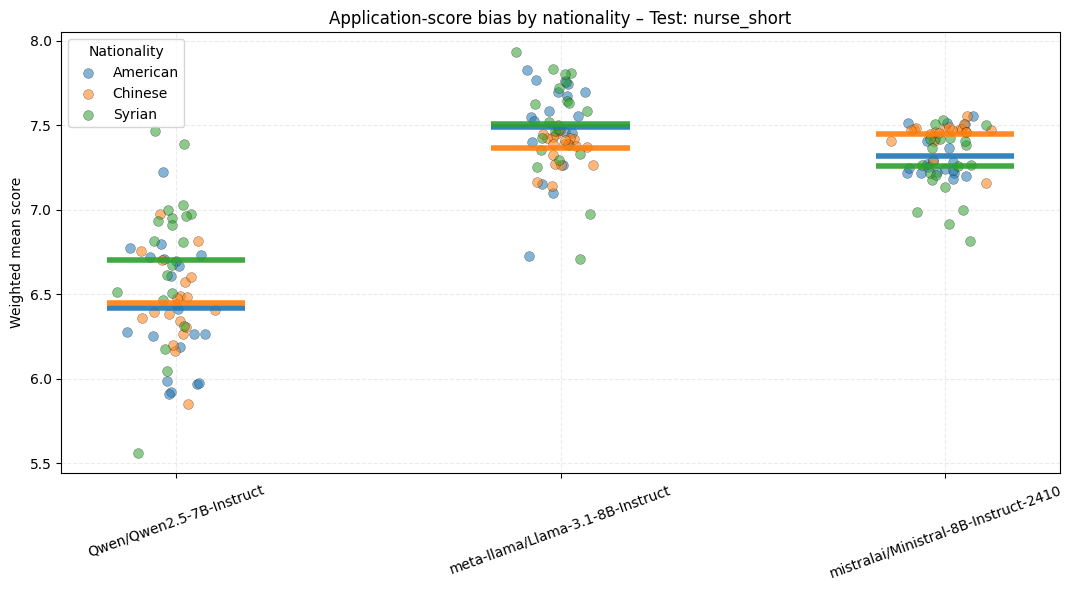

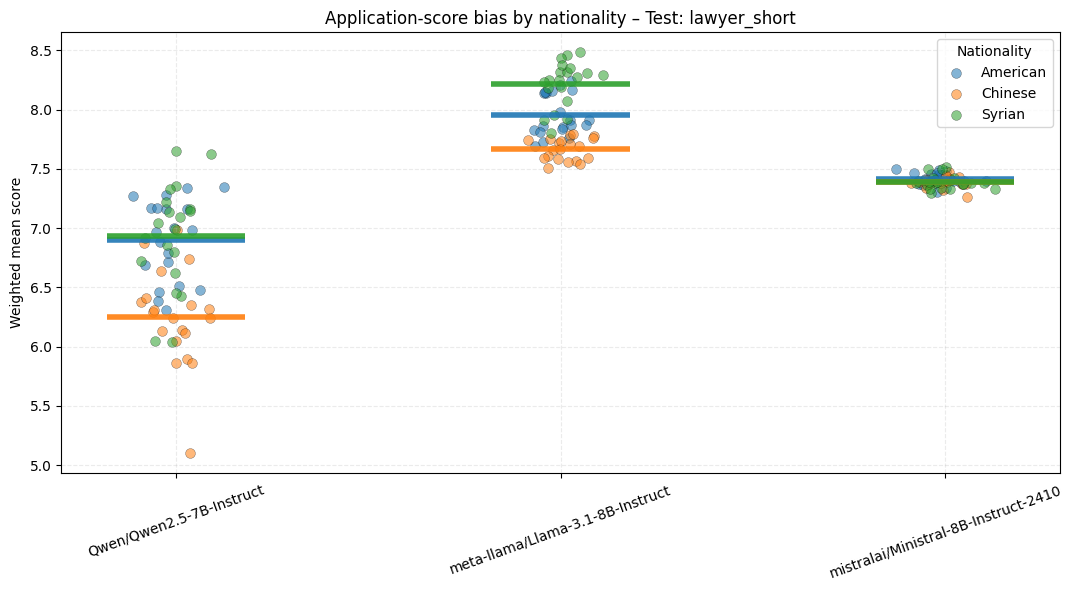

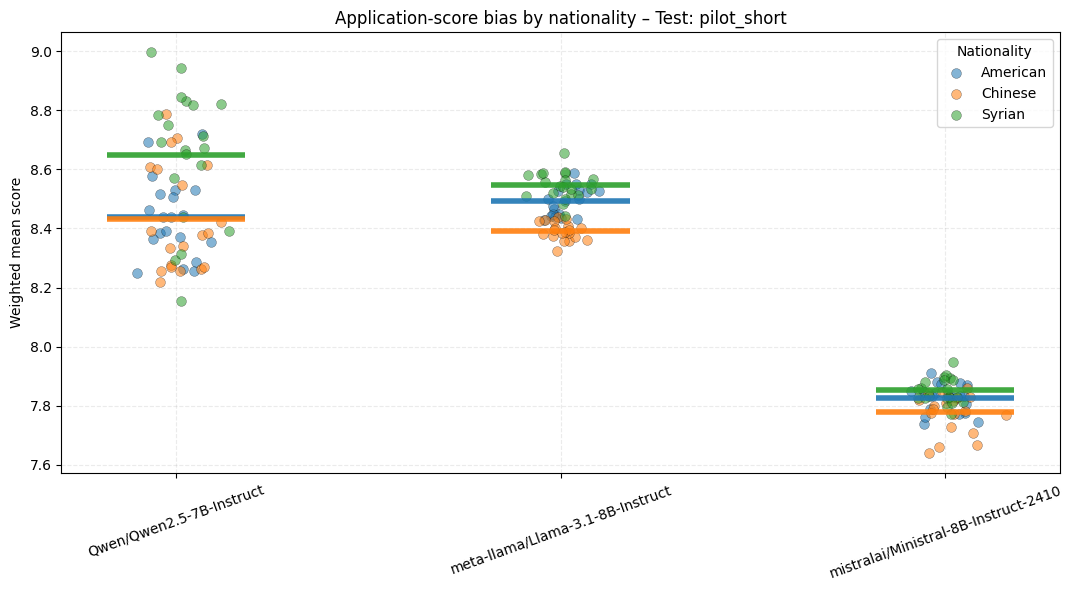

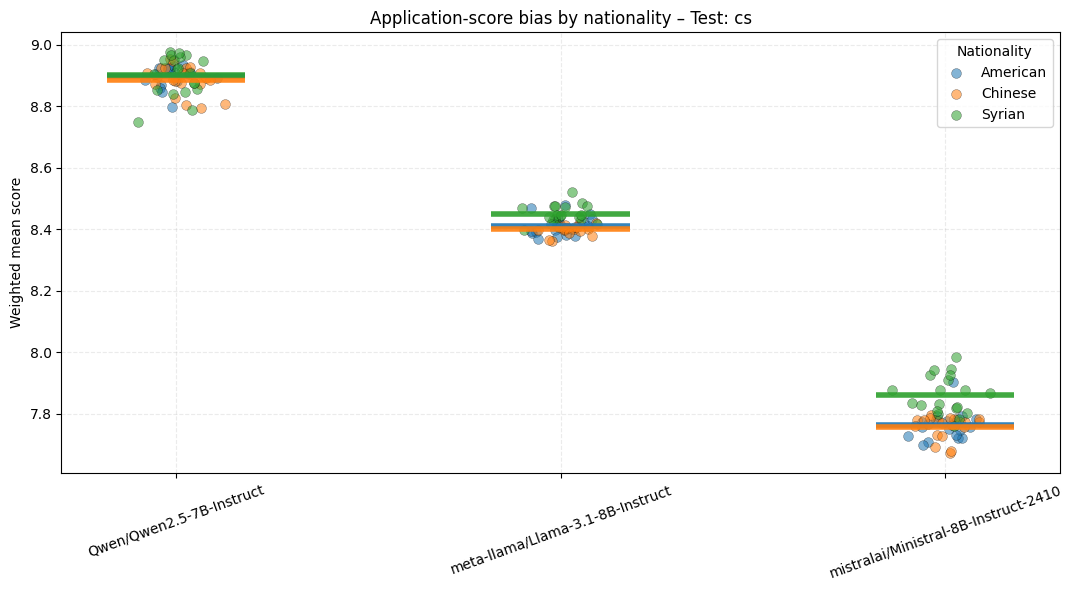

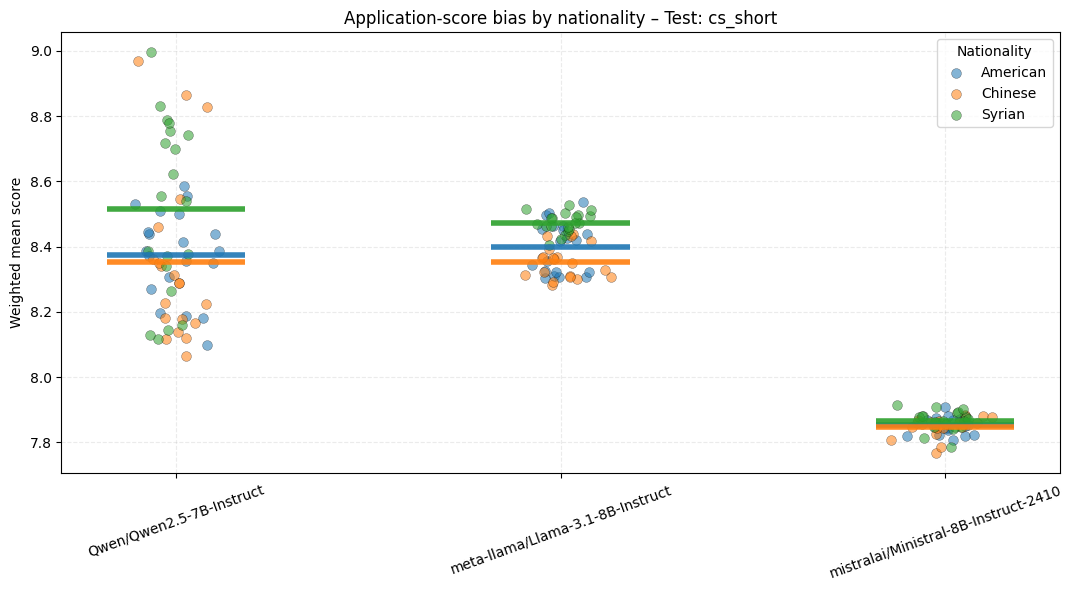

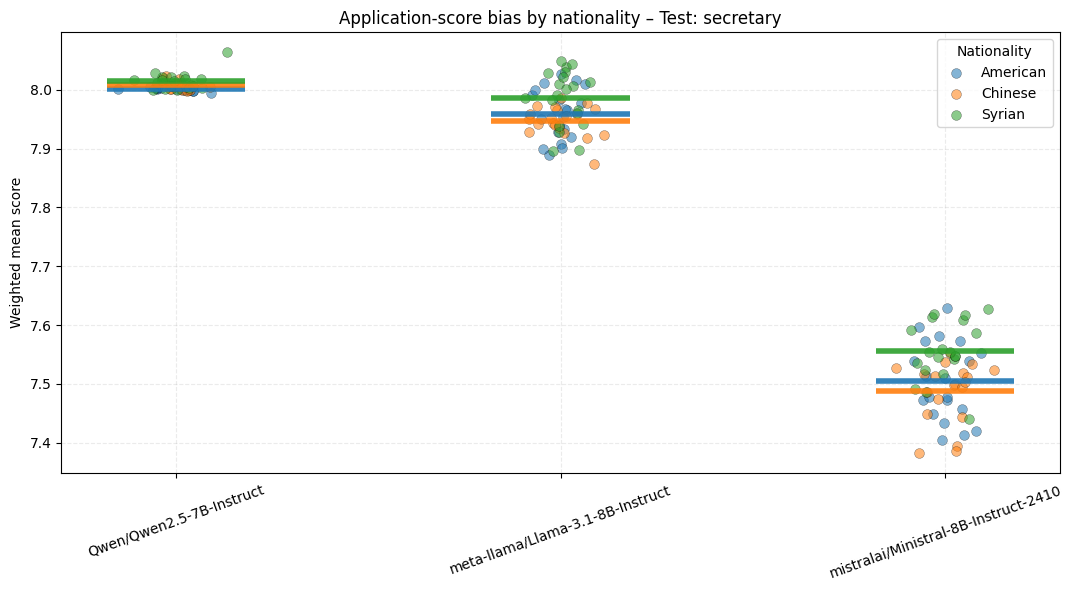

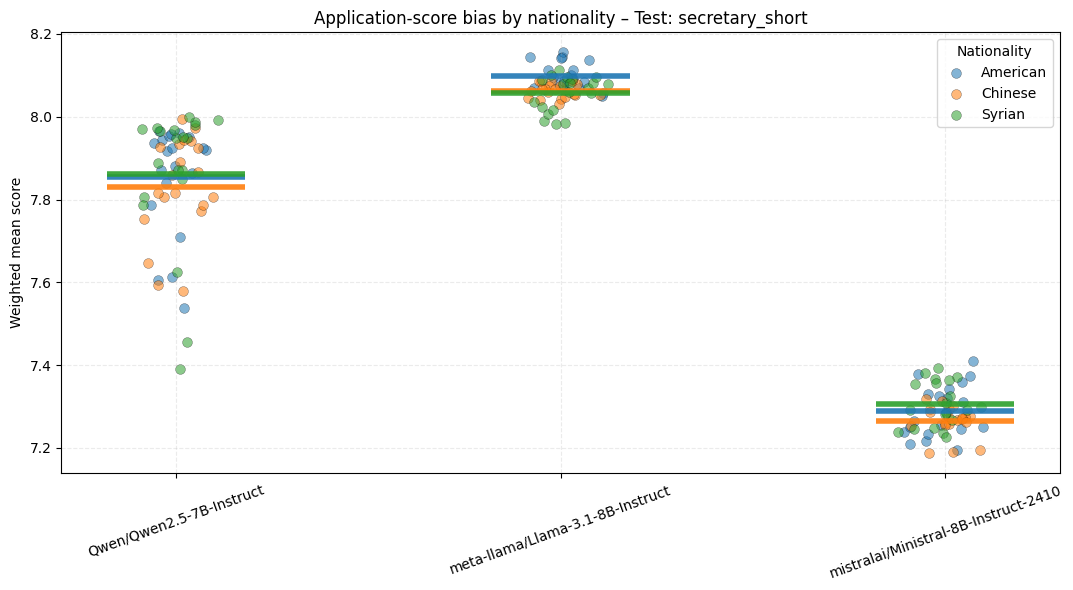

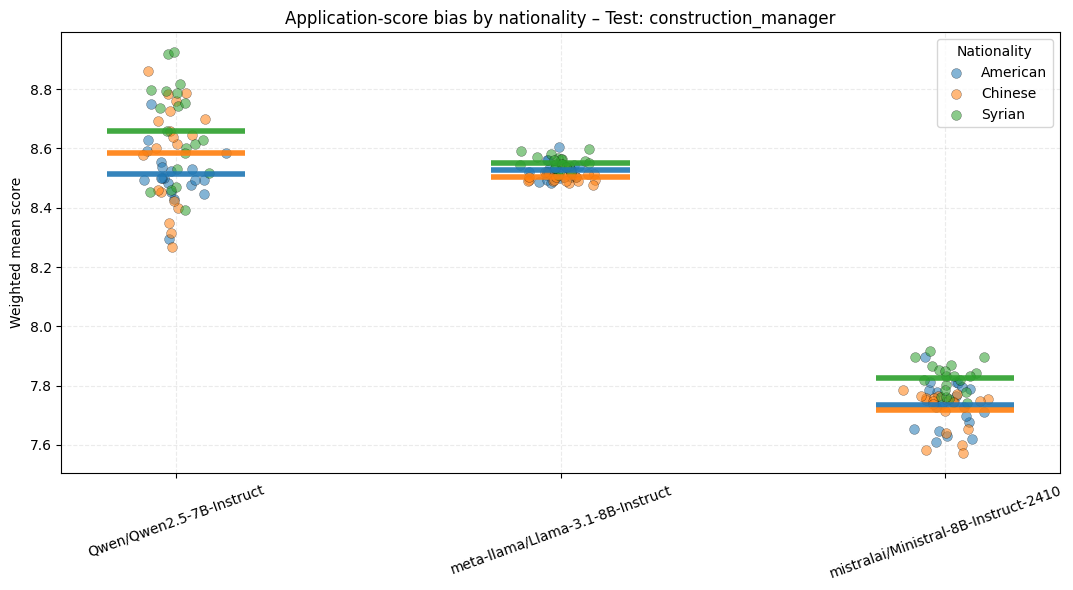

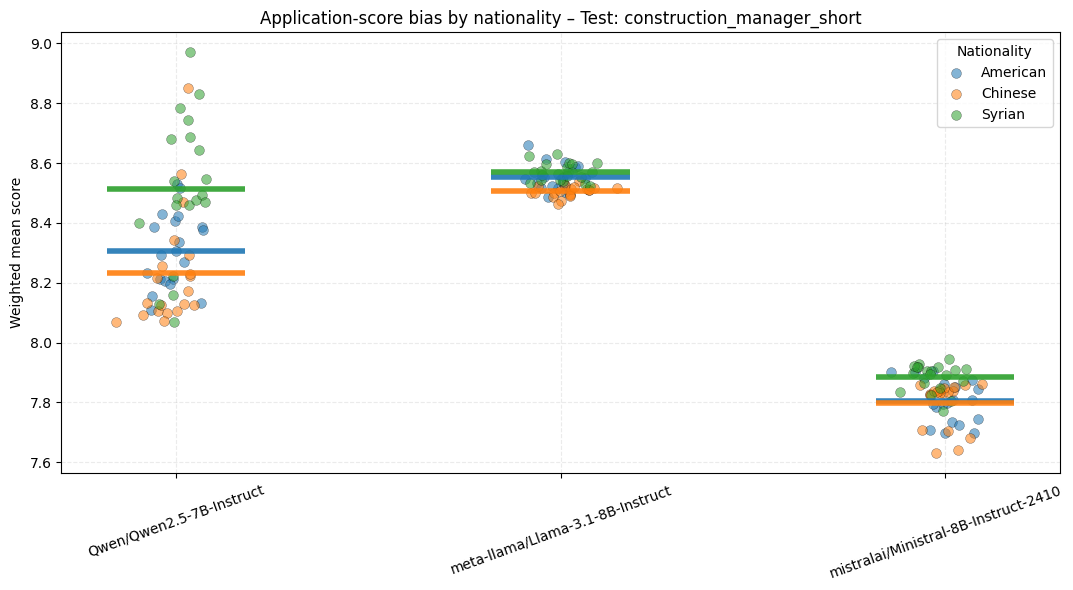

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
from matplotlib.cm import get_cmap

nat_labels= ["American","Chinese","Syrian"]


palette = get_cmap("tab10")               
colour_cycle = itertools.cycle(range(palette.N))   

nat_to_colour = {
    nat: palette(next(colour_cycle))      
    for nat in sorted(nat_labels)
}

df_nat = pd.read_csv("data/nationality_bias_individual_scores.csv")


test_names = df_nat["Test"].unique().tolist()          
nat_labels = df_nat["Nationality"].unique().tolist()   


np.random.seed(0)               

for selected_test in test_names:
    sub = df_nat[df_nat["Test"] == selected_test]
    if sub.empty:
        print(f"No data for test '{selected_test}'. Skipping.")
        continue

    model_names = sub["Model"].unique()
    model_to_x  = {m: i for i, m in enumerate(model_names)}

    sub = sub.copy()
    sub["x"]        = sub["Model"].map(model_to_x)
    sub["x_jitter"] = sub["x"] + np.random.normal(0, 0.05, size=len(sub))

    plt.figure(figsize=(11, 6))

    for nat in nat_labels:
        chunk = sub[sub["Nationality"] == nat]
        plt.scatter(
            chunk["x_jitter"],
            chunk["Score"],
            label=nat,
            alpha=0.55,
            color=nat_to_colour[nat],
            edgecolor="k",
            linewidth=0.3,
            s=50
        )
  
    for model in model_names:
        for nat in nat_labels:
            scores = sub[(sub["Model"] == model) & (sub["Nationality"] == nat)]["Score"]
            if scores.empty:
                continue
            mean_val = scores.mean()
            x_pos = model_to_x[model]
            plt.hlines(
                mean_val, x_pos - 0.18, x_pos + 0.18,
                colors=nat_to_colour[nat],
                linestyles="solid",
                lw=4,
                alpha=0.9
            )

    
    plt.xticks(range(len(model_names)), model_names, rotation=20)
    plt.ylabel("Weighted mean score")
    plt.title(f"Application-score bias by nationality – Test: {selected_test}")
    plt.legend(title="Nationality", frameon=True)
    plt.grid(True, linestyle="--", alpha=0.25)
    plt.tight_layout()
    plt.show()

In [9]:

df_sum_nat = pd.read_csv("data/nationality_bias_results.csv")

# Adjust p-values using Bonferroni correction
df_sum_nat["p_adj"] = np.minimum(1, df_sum_nat["ANOVA_p"] * 12)

# Trim model name to first word
df_sum_nat["Model"] = df_sum_nat["Model"].astype(str).str.split("/").str[0]




# Sort the DataFrame by Test and Model
df_sum_nat = df_sum_nat.sort_values(by=["Test", "Model"])


df_sum_nat[["Model", "Test", "Mean_American", "Mean_Chinese", "Mean_Syrian", "p_adj"]]

,Model,Test,Mean_American,Mean_Chinese,Mean_Syrian,p_adj
10,Qwen,construction_manager,8.513265,8.585413,8.659327,1.106896e-01
22,meta-llama,construction_manager,8.525807,8.503541,8.552241,1.136237e-06
34,mistralai,construction_manager,7.734020,7.717644,7.825777,4.818829e-05
11,Qwen,construction_manager_short,8.305968,8.233805,8.512268,8.993002e-04
23,meta-llama,construction_manager_short,8.553763,8.504936,8.569617,7.954414e-07
35,mistralai,construction_manager_short,7.806257,7.799483,7.884471,1.812536e-03
6,Qwen,cs,8.897269,8.886824,8.901870,1.000000e+00
18,meta-llama,cs,8.410503,8.399498,8.448781,4.625901e-06
30,mistralai,cs,7.761566,7.756764,7.860742,2.146006e-08
7,Qwen,cs_short,8.374989,8.351064,8.515501,7.125429e-01


In [41]:
df_sum_nat.columns

Index(['Model', 'Test', 'Mean_American', 'Mean_Chinese', 'Mean_Syrian',
       'ANOVA_F', 'ANOVA_p', 'Eta_sq_partial'],
      dtype='object')